### Problem 1

D

### Problem 2

$D(A) = \frac{3}{4.75} \approx 0.63$

$D(B) = \frac{2}{3} \approx 0.66$

The B is better.

The better clustering will have a higher dunn index.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

In [51]:
# Creat 2 set of datapoints
n = 300     
# When the points number n = 100, the points is a little spase, so two set will 
# join together easily, and the result for agglomerative clustering will have a 
# bad performing. Therefore, I increase the number of points to 300 to have a more
# better performing result.

r1 = np.random.normal(10, 0.2, n)
Degree1 = np.random.randint(0, 360, n) 

r2 = np.random.normal(8, 0.2, n)
Degree2 = np.random.randint(0, 360, n) 

In [52]:
# define function to transfer the (r, theta) to (x, y)
def x_trans(r,D):
    return r * np.cos(D)

def y_trans(r,D):
    return r * np.sin(D)

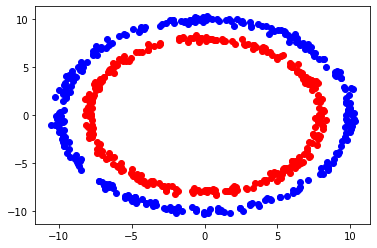

In [53]:
# Plot two donuts
plt.scatter(x_trans(r1, Degree1), y_trans(r1, Degree1), color = 'b')
plt.scatter(x_trans(r2, Degree2), y_trans(r2, Degree2), color = 'r')
plt.show()

In [54]:
# Merge two dataset for training
x1 = list()
x2 = list()
for n in range(n):
    x1.append([x_trans(r1[n], Degree1[n]), y_trans(r1[n], Degree1[n])])
    x2.append([x_trans(r2[n], Degree2[n]), y_trans(r2[n], Degree2[n])])

X =np.array(x1 + x2)

In [55]:
# Kmeans clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

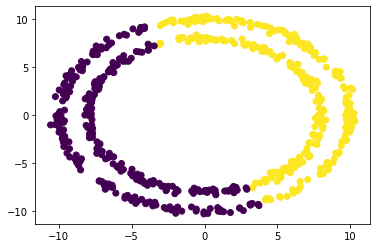

In [56]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.show()

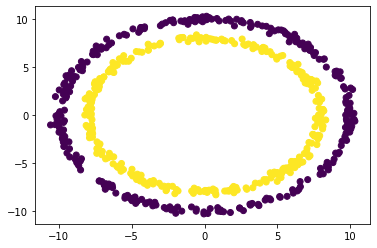

In [57]:
# Agglomerative Clustering with single linkage
Agg = AgglomerativeClustering(linkage='single').fit(X)
plt.scatter(X[:,0], X[:,1], c=Agg.labels_)
plt.show()

The agglomeratice clustering with single linkage can separate the donuts

### Problem 4

In general, these two different categories of products require different recommendation methods according to product needs. For fashion's new products, what we need is speed. We need to recommend it to customers as soon as possible, even if it has some impact on the accuracy of the recommendation. And for regular new products, what we need is accuracy. But this may require a more complex model to classify the model. Categorizing through complex models tends to take more time, so we may not be able to recommend products to customers right away.

1.Pre-processing

When there is a new product, we only have the text descriptions. We need to convert the text to vectors for the model to use. So, whatever the type of this new product is, we need to do the same pre-processing step for the two different types of products. bag of words, TF-IDF, and other Word2Vec methods for pre-processing.

2.Product Classification 

For fashion products, because we need to classify products immediately, we need to use some classfication models with predict ability. Models can be built using all of the fashion products you already have, such as Logistic Regression or random forest. In this way, whenever there is a new product, we do not need to retrain the model, and we can use these trained models to predict the classification of products. In this way, the product can be recommended to users as soon as possible. When using this method, we need to divide the products we already have into train set and evaluation set, use the train set to build the model, and then use the evaluation set to evaluate the model.

For regular products, we require the accuracy of recommendations, and the time from product launch to recommendation is not a major consideration. Therefore, we can use some complex but higher accuracy models to classify products, such as some un-supervised models. We can use the clustering model to classify these new products together with the products we already have at regular intervals, such as kmeans, Hierarchical Clustering.

3.Product recommendation prediction 

After the classification is completed, we can use the SVD/PCA method in the product recommendation stage to predict the products that users may be interested in. Recommend products that users haven't purchased before by using all users' purchase data. At the same time, the user's browsing and search records can be integrated into the SVD/PCA model. This user purchase prediction model works for two different types of products because the main purpose of the model is to select the recommended product categories for different users, not to classify the products. We can also update this recommendation model every once in a while.